In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
temp = pd.read_csv("titanic_train.csv")

In [132]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
temp.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

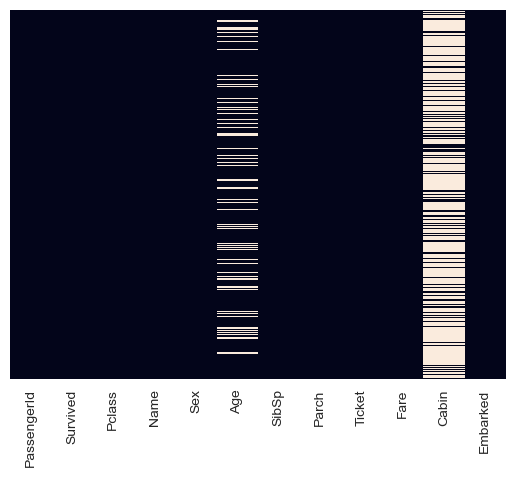

In [134]:
sns.heatmap(temp.isnull(),yticklabels=False,cbar=False)

<Axes: xlabel='Survived', ylabel='count'>

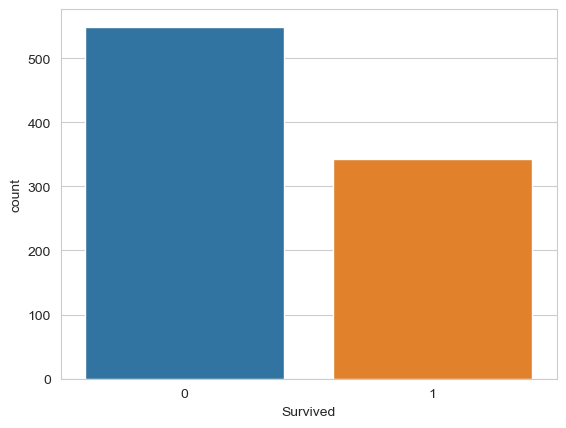

In [135]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=temp)

<Axes: xlabel='Survived', ylabel='count'>

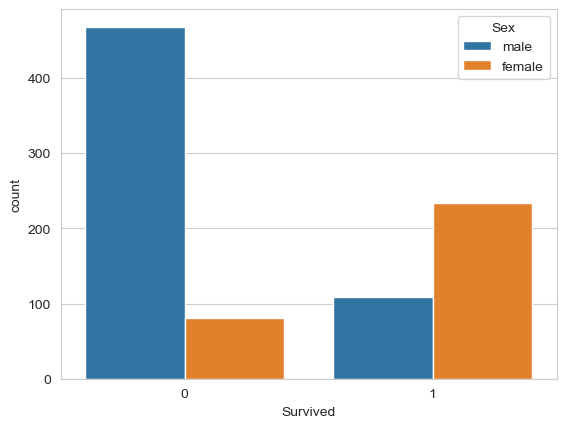

In [136]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=temp)

<Axes: xlabel='Survived', ylabel='count'>

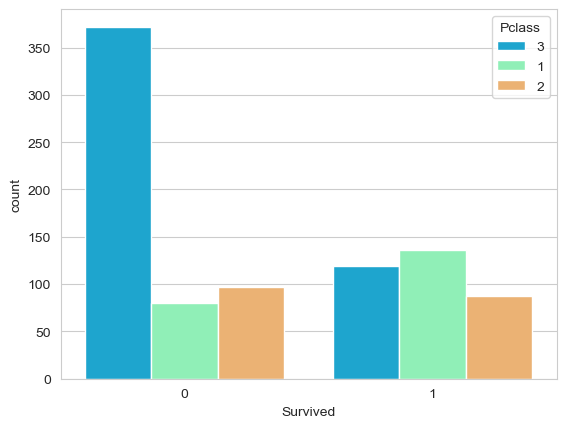

In [137]:
temp['Pclass'] = temp['Pclass'].astype(str)
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=temp,palette='rainbow')

<Axes: xlabel='SibSp', ylabel='count'>

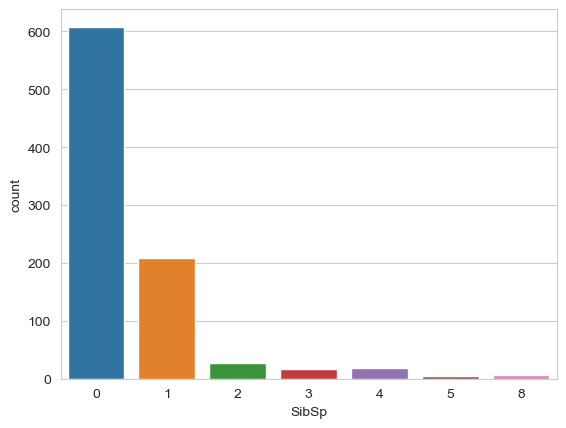

In [138]:
 sns.countplot(x='SibSp',data=temp)

<Axes: xlabel='Pclass', ylabel='Age'>

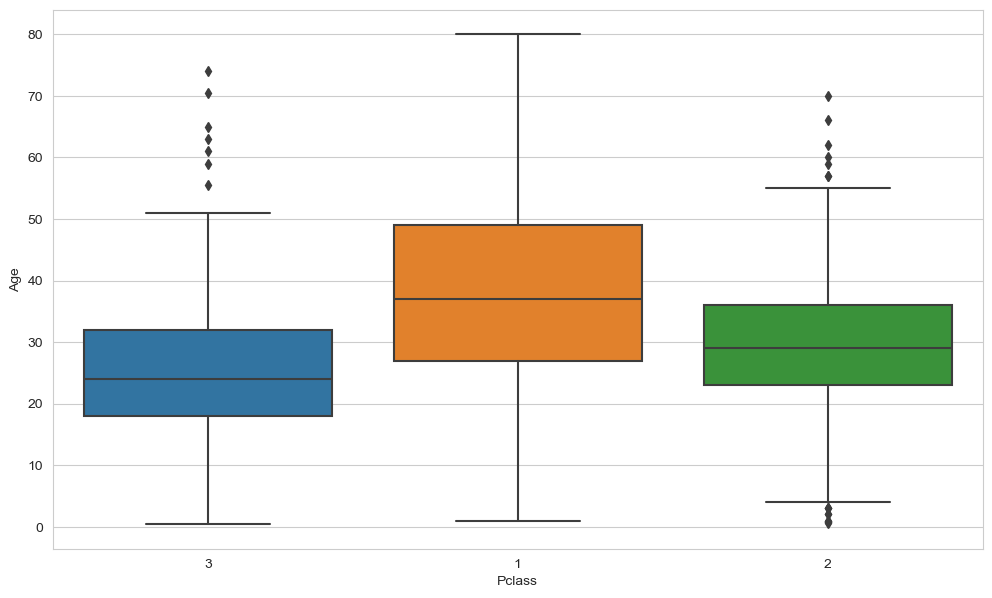

In [139]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=temp)

In [140]:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [141]:
temp['Age'] = temp[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

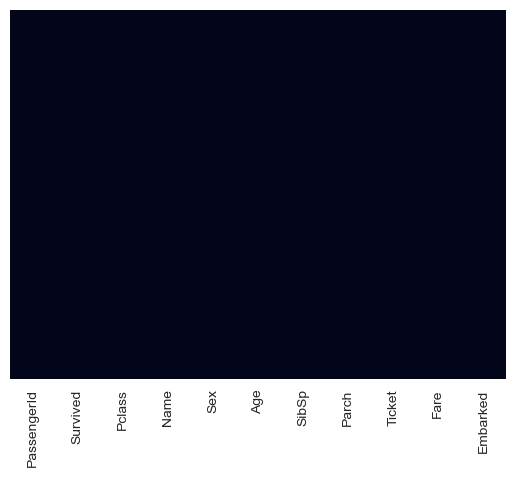

In [144]:
sns.heatmap(temp.isnull(),yticklabels=False,cbar=False)


In [143]:
temp.drop('Cabin',axis=1,inplace=True)

In [145]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [146]:
temp.dropna(inplace=True)

In [147]:
pd.get_dummies(temp['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [148]:
sex = pd.get_dummies(temp['Sex'],drop_first=True)
embark = pd.get_dummies(temp['Embarked'],drop_first=True)

In [149]:
temp.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [150]:

temp.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [151]:
temp = pd.concat([temp,sex,embark],axis=1)

In [152]:
temp.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True
